## Library

In [1]:
# https://www.kaggle.com/code/sandeepbhogaraju/text-summarization-with-seq2seq-model/notebook
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import time
import json
from konlpy.tag import Okt
import re
import spacy
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from collections import defaultdict

C:\Users\khyog\anaconda3\envs\newLab\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#HYPER PARAMETER
DATA_PATH = './data2.json'
DATA_BATCH = 16
TRAIN_BATCH = 16

In [3]:
# data loading
def loadData():
    with open(DATA_PATH, "r") as f:
        data = json.load(f)
    title = []
    content = []
    for i in data:
        title.append(i["title"])
        content.append(i["content"])
    return title, content

In [4]:
title, content = loadData()

In [5]:
# tokenizer, tagging, lemmatizer, textCategorizer
from time import time

nlp = spacy.load("ko_core_news_sm", disable=['ner', 'parser'])

t = time()

text = []

for c in content:
    txt = ''
    for doc in nlp.pipe(c, batch_size=DATA_BATCH):
        txt+=str(doc)
    text.append(txt)

# text = [str(doc) for doc in nlp.pipe(c, batch_size=5000) for c in content]

print(round(time()-t/60, 2))

1626136660.27


In [6]:
text

['문 대통령은 "저는 여러분이 아직 무엇을 이루기에 어리다고 생각하거나, 기성세대가 만든 높은 장벽에 좌절하여 도전을 포기하지는 않길 바란다"며 이같이 역설했다.또 문 대통령은 "모든 물이 모여 큰 강을 이루고 바다를 향해 나아가듯이 여러분이 끝까지 포기하지 않고 함께 해주실 것이라 믿는다"며 "얼마든지 기성세대에 도전하고 무엇이든 이룰 수 있다는 자신감만은 꼭 가슴에 담아달라"고 당부했다.이어 문 대통령은 "4차 산업혁명의 새로운 시대가 시작되고 있다"며 "세계는 이미 새로운 인재, 창의적인 인재에 열광하고 있다"고 지적했다.문 대통령은 젊음 그 자체가 4차 산업혁명의 경쟁력이 될 수 있다고 강조하고, "앞선 세대가 이룩해 놓은 것들을 해체하고, 새롭게 융합하는 창의적인 사고가 4차 산업혁명 시대가 필요로 하는 인재"라고 강조했다.문 대통령은 "여러분의 신선하고 발랄한 생각, 자유로운 의사소통과 삶의 일부가 된 ICT 기술과 문화는 기성세대가 갖지 못한 능력"이라며 "반짝이는 아이디어가 경쟁력이고, 감수성도 경쟁력이며, 공감능력도 경쟁력이다"고 설명했다.문 대통령은 \'변화에 대한 능동적인 대처"도 역설했다.문 대통령은 "앞으로 더 많은 청년들이 글로벌 기업에 직장을 얻고 세계 곳곳에서 살게 될 것"이라며 "변화에 대한 능동적인 대처만이 변화를 이겨내는 길"이라고 말했다.이어 문 대통령은 인생선배로서 말한다며 "모두에게 적용되는 인생의 정답이란 없지만, 여러분이 포기하지 않고 열심히 사는 하루하루가 여러분 인생의 답이 될 것"이라고 졸업생들을 격려했다.',
 '그의 또 다른 관심사는 3기 신도시다.이 사장은 "경기 고양시에 축구장 100개 면적의 \'방송영상밸리\'가 들어설 예정"이라면서 "경기 남부권의 판교~용인~수원~평택으로 이어지는 첨단 산업 흐름처럼, 경기 서북권에도 여의도~상암~일산까지 이어지는 우리나라 방송·영상의 산업 흐름을 만들겠다"고 말했다.공사 역대 최연소 사장으로 임명된 이 사장은 서울대학교 공과대학을 졸업하고 사법시험에 합격해 민생경제

In [7]:
t = time()

target = []

for doc in nlp.pipe(title, batch_size=DATA_BATCH):
    target.append("_START_" + str(doc) + "_END_")
        
print(type(t))

<class 'float'>


In [8]:
target

['_START_문 대통령, 사회 첫 발 내딛는 청춘 응원_END_',
 '_START_"분양주택 안 부러운 중산층 임대 내놓을 것"_END_',
 '_START_스카이라이프, 4Q 예상치 하회·신성장동력 필요...목표가↓-현대차_END_',
 '_START_경성대학교 재능기부&사회봉사, 장애인을 위한 스포츠 힐링 프로그램 11기 “다함께 차차차”_END_',
 '_START_환경부 블랙리스트 영장 기각_END_',
 "_START_'살림남2' 김승현과 딸 수빈 여전히 어색한 사인 '무슨 일?'_END_",
 '_START_일본 수출규제 각의결정 대비 대전시 대응 준비나서_END_',
 '_START_성인 3명 중 2명 `특정 지역 출신` 등이라고 혐오 표현 경험_END_',
 "_START_한전, 강원산불 이재민에 추석 전 '피해금 100억원' 지급_END_",
 '_START_文 대통령, 윤석열 검찰총장 후보자 임명 재가_END_',
 '_START_중기중앙회, 제1회 KBIZ문화경영포럼 개최_END_',
 '_START_전주국제영화제, 문성경 신임 프로그래머 선임_END_',
 '_START_10월 28일, 코스닥 상장사 루미마이크로 현재 1,495원대 주가 형성_END_',
 '_START_서전고등학교 ‘서전학사’ 준공식 개최_END_',
 '_START_균형위, 균형발전지표 통계청과 연계 협력_END_',
 '_START_괴산군, A형간염 "예방접종 및 개인위생수칙 준수가 최선"_END_',
 "_START_광안리어방축제 피너클어워드 '4년 연속' 수상_END_",
 '_START_거래소, 다음 달 국채선물 상품간 스프레드 거래 도입_END_',
 '_START_임실군, 마을 만들기 활성화 민·관 맞손_END_',
 "_START_음성군 '우리가락 우리마당 지원 공모사업' 선정_END_",
 '_START_“자연경관 좋지만 혼잡해 불편”_END_',
 '_START_전북대, 청년 TLO육성사업 대폭 증액 ‘탄력’_END_',
 "_START_청주테크노

In [9]:
pre = pd.DataFrame()

In [10]:
pre['cleaned_text'] = pd.Series(text)
pre['cleaned_summary'] = pd.Series(target)

In [11]:
pre['cleaned_summary']

0                    _START_문 대통령, 사회 첫 발 내딛는 청춘 응원_END_
1                  _START_"분양주택 안 부러운 중산층 임대 내놓을 것"_END_
2      _START_스카이라이프, 4Q 예상치 하회·신성장동력 필요...목표가↓-현대차_END_
3      _START_경성대학교 재능기부&사회봉사, 장애인을 위한 스포츠 힐링 프로그램 11...
4                            _START_환경부 블랙리스트 영장 기각_END_
                             ...                        
995    _START_최수종, 하희라 위한 셀프 세면대 뚝딱.."하희라 안 아프고 좋다"_END_
996                _START_‘5·18 왜곡’ 이동욱, 진상조사위원 재추천_END_
997                 _START_곳곳 누비는 유세차량...뜨거운‘선거 열기’_END_
998      _START_남양주 진관산단 대형차량 통행 인근 주민 교통체증 등 불편 호소_END_
999      _START_대우건설 상반기 신규 수주 6조4000억 달성, 업계 수위 성과_END_
Name: cleaned_summary, Length: 1000, dtype: object

In [12]:
pre['cleaned_text']

0      문 대통령은 "저는 여러분이 아직 무엇을 이루기에 어리다고 생각하거나, 기성세대가 ...
1      그의 또 다른 관심사는 3기 신도시다.이 사장은 "경기 고양시에 축구장 100개 면...
2      황 연구원은 "수신료 매출이 제한적이고 최근 성장을 견인했던 티커머스 송출 수수료도...
3      경성대학교 스포츠건강학과는 질 높은 프로그램을 제공하기 위해 연령별 분반수업을 실시...
4      이는 과거 박근혜 정부에서 문화계 블랙리스트 사건과 대비되어 법조계는 물론이고 전 ...
                             ...                        
995    두 사람은 장흥에서 한 달간 둘만의 시간을 보내며 잃어버린 설렘을 되찾기로 했다.이...
996    자유한국당은 지난 2월 문재인 대통령이 임명을 거부한 2명 중 권태오 전 한미연합군...
997    지난달 31일 13일간 본격적인 선거 운동 기간이 시작되면서 후보들마다 유세차량과 ...
998    조성 당시 섬유·의복·전자부품·기계·가구 업체 등을 비롯해 레미콘 업체 3곳 등 모...
999    대우건설 관계자는 "인천 한들구역, 장위6구역 등 국내 주택사업과 이라크 알 포 컨...
Name: cleaned_text, Length: 1000, dtype: object

In [13]:
len(title)

1000

In [14]:
text_count = []
summary_count = []

In [15]:
for sent in pre['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in pre['cleaned_summary']:
    summary_count.append(len(sent.split()))

In [16]:
graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

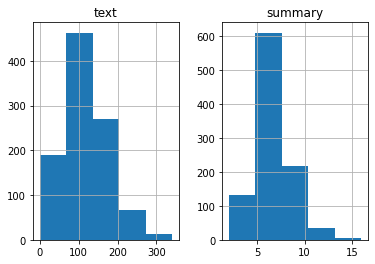

In [17]:
graph_df.hist(bins = 5)
plt.show()

In [18]:
#Check how much % of summary have 0-15 words
cnt=0
for i in pre['cleaned_summary']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(pre['cleaned_summary']))

0.999


In [19]:
#Check how much % of text have 0-70 words
cnt=0
for i in pre['cleaned_text']:
    if(len(i.split())<=100):
        cnt=cnt+1
print(cnt/len(pre['cleaned_text']))

0.412


In [68]:
#Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len=100
max_summary_len=15

In [21]:
#Select the Summaries and Text between max len defined above

cleaned_text =np.array(pre['cleaned_text'])
cleaned_summary=np.array(pre['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

In [22]:
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [23]:
post_pre.head(2)

,text,summary
0,"문 대통령은 ""저는 여러분이 아직 무엇을 이루기에 어리다고 생각하거나, 기성세대가 ...","sostok _START_문 대통령, 사회 첫 발 내딛는 청춘 응원_END_ eostok"
1,"그의 또 다른 관심사는 3기 신도시다.이 사장은 ""경기 고양시에 축구장 100개 면...","sostok _START_""분양주택 안 부러운 중산층 임대 내놓을 것""_END_ e..."


In [129]:
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.1,random_state=0,shuffle=True)

In [130]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [131]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 90.63772322328376
Total Coverage of rare words: 48.33015349180976


In [132]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt)
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 4646


In [133]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [134]:
thresh=3

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 94.38978438350429
Total Coverage of rare words: 50.39046444718455


In [135]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt)
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 269


In [136]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [137]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [138]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 300
embedding_dim= 200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 4646
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 200)     929200      input_17[0][0]                   
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100, 300), ( 601200      embedding[0][0]                  
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, None)]       0                                            
_________________________________________________

In [139]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [140]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [141]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=TRAIN_BATCH, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
57/57 [==============================] - 105s 2s/step - loss: 1.1252 - val_loss: 0.4895
Epoch 2/50
57/57 [==============================] - 98s 2s/step - loss: 0.6846 - val_loss: 0.4251
Epoch 3/50
57/57 [==============================] - 99s 2s/step - loss: 0.7141 - val_loss: 0.4160
Epoch 4/50
57/57 [==============================] - 98s 2s/step - loss: 0.6373 - val_loss: 0.4158
Epoch 5/50
57/57 [==============================] - 104s 2s/step - loss: 0.6226 - val_loss: 0.4184
Epoch 6/50
57/57 [==============================] - 100s 2s/step - loss: 0.6139 - val_loss: 0.4207
Epoch 00006: early stopping


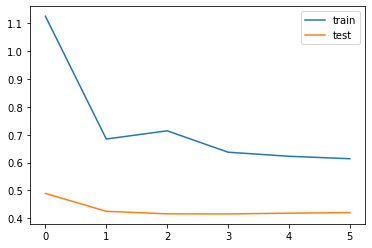

In [142]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [143]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [144]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [145]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [146]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString


In [147]:
for i in range(0,100):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: 요즈마 최근 큰 관심을 보이고 있다 전북도 과장은 우리나라 특히 수 있지만 요즈마 그룹은 그 자체가 라며 요즈마 만들 경우 다른 회사의 스타트업 효과가 고 설명했다 창업 투자를 하는 경쟁력 있는 사업을 한다 같은 형태로 요즈마 그룹은 핀테크 있다 도 관계자는 요즈마 그룹은 큰 관심을 보이며 활동이 다른 많은 부가가치를 창출할 수 있는 가능성이 며 내용은 협의를 이어나갈 방침 이라고 말했다 
Original summary: start 글로벌 전북 end 
Predicted summary:  start end


Review: 이번 영화를 그대로 줄 수 있도록 각 이야기를 담아 소장 가치를 높이고 고객들에게 재미를 대표 들어간 있다 한편 상품 출시를 기념해 주인공 집을 그대로 고객들에게 큰 재미를 선사할 예정이다 해당 상품은 18일 공식 20일 전국 오프라인 매장에서 구매할 수 있다 관계자는 지난 5월 일부 상품 될 만큼 반응이 며 더욱 다양한 것 이라고 말했다 상품을 선보인다 
Original summary: start end 
Predicted summary:  start end


Review: 올해부터 중심으로 미세먼지 시는 미세먼지 지난해까지 공공 민간 방침이다 특히 지난해까지 포함한 전국적으로 개선에 됐다 미세먼지가 아닌 모든 차량의 수도권 인천의 경우 체감할 수 있는 위해 제도를 확대 지난해 차량 및 강화했다 때는 과태료 20만 원 10만 원의 이밖에도 일반 저녹스 교체 시 산업용 저녹스 설치 시 지원하는 등 통한 나선다 저녹스 0 lng 보일러 중 환경부 고시 원을 받을 수 있다 저녹스 설치 중소기업이 보일러 등의 저녹스 경우 따라 금액을 사업이다 시 관계자는 미세먼지 강화와 개선해 시민들의 예방할 수 있을 것 이라고 말했다 
Original summary: start 미세먼지 확대 end 
Predicted summary:  start end


Review: 따라 들어 및 아래 자동차 및 및 이중 다시 및 및 등 가장 많고 1만 농

KeyboardInterrupt: 

In [ ]:
target

In [67]:
x_tr[0]

array([2642,   65,   60,  269,  706,    1, 2162, 2163,  770,   32,    3,
        188, 2642, 1808,   70,  771,  165, 2642, 1809,   46,  114, 3397,
       1060,  772,    4,  102,  439,  707,   77,  493,    6,  111,   53,
         87,  640, 2642, 1808, 1810,    1,  178,   23, 2642, 1808,   60,
        269, 3398, 1559,  114,   51, 3399, 2164,    3,    6,  412,   11,
        641, 1811, 2643, 3400,   26,    7,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [111]:
y_tr

array([[   1,    2,  159, ...,    3,    4,    0],
       [   1,    2,  671, ...,  680,    3,    4],
       [   1,    2,  271, ...,    0,    0,    0],
       ...,
       [   1,    2,   41, ...,    0,    0,    0],
       [   1,    2,  363, ...,    0,    0,    0],
       [   1,    2, 4775, ...,    0,    0,    0]])

In [77]:
seq2summary(y_tr[-3])

'start 올 end '

In [59]:
post_pre

,text,summary
0,"문 대통령은 ""저는 여러분이 아직 무엇을 이루기에 어리다고 생각하거나, 기성세대가 만든 높은 장벽에 좌절하여 도전을 포기하지는 않길 바란다""며 이같이 역설했다.또 문 대통령은 ""모든 물이 모여 큰 강을 이루고 바다를 향해 나아가듯이 여러분이 끝까지 포기하지 않고 함께 해주실 것이라 믿는다""며 ""얼마든지 기성세대에 도전하고 무엇이든 이룰 수 있다는 자...","sostok _START_문 대통령, 사회 첫 발 내딛는 청춘 응원_END_ eostok"
1,"그의 또 다른 관심사는 3기 신도시다.이 사장은 ""경기 고양시에 축구장 100개 면적의 '방송영상밸리'가 들어설 예정""이라면서 ""경기 남부권의 판교~용인~수원~평택으로 이어지는 첨단 산업 흐름처럼, 경기 서북권에도 여의도~상암~일산까지 이어지는 우리나라 방송·영상의 산업 흐름을 만들겠다""고 말했다.공사 역대 최연소 사장으로 임명된 이 사장은 서울대학...","sostok _START_""분양주택 안 부러운 중산층 임대 내놓을 것""_END_ eostok"
2,"황 연구원은 ""수신료 매출이 제한적이고 최근 성장을 견인했던 티커머스 송출 수수료도 성장세가 둔화되고 있는 상황에서 기존 플랫폼 비즈니스를 넘어 새로운 성장엔진이 필요한 시점인 것으로 판단된다""며 ""스카이라이프는 현재 자회사로 11개 채널을 운영하고 있는 스카이라이프TV에 대한 운영전략을 비교적 보수적으로 가져가고 있는데 컨텐츠 투자, 자체제작 확대...","sostok _START_스카이라이프, 4Q 예상치 하회·신성장동력 필요...목표가↓-현대차_END_ eostok"
3,"경성대학교 스포츠건강학과는 질 높은 프로그램을 제공하기 위해 연령별 분반수업을 실시하여 그 시기에 맞는 활동을 통해 신체능력을 향상시키고 있으며 수업에 참여하는 학생과 교사 비율을 약 2.2:1로 한 교사가 2명의 학생을 맡아 진행하고 있다.스포츠건강학과 최승준 교수가 운영하는 ‘다함께 차차차’ 프로그램은 오는 2019년 04월 06일 토요일, 오전...","sostok _START_경성대학교 재능기부&사회봉사, 장애인을 위한 스포츠 힐링 프로그램 11기 “다함께 차차차”_END_ eostok"
4,이는 과거 박근혜 정부에서 문화계 블랙리스트 사건과 대비되어 법조계는 물론이고 전 국민이 관심을 가지고 지켜보고 있습니다.지난 정부의 ‘문화체육관광부 블랙리스트’ 사건은 소위 ‘최순실 사태’의 일각으로 진보성향 인사나 당시 정부에 반대하는 성향의 문화계 인사들의 리스트를 만들고 이 들에 대하여 정권 차원에서 의도적으로 불이익하게 처분한 사건입니다.더...,sostok _START_환경부 블랙리스트 영장 기각_END_ eostok
...,...,...
995,"두 사람은 장흥에서 한 달간 둘만의 시간을 보내며 잃어버린 설렘을 되찾기로 했다.이날 집을 구경하던 하희라와 최수종은 화장실에 세면대가 없다는 것을 알았고, 최수종은 하희라를 위한 세면대를 만들기 위해 집 옆의 작업실을 찾았다.목판을 고른 최수종은 본격적으로 목판을 자르고 망치질을 하는 등 작업을 시작했다.이 모습을 본 MC 서장훈은 ""늘 자상하셨는...","sostok _START_최수종, 하희라 위한 셀프 세면대 뚝딱..""하희라 안 아프고 좋다""_END_ eostok"
996,"자유한국당은 지난 2월 문재인 대통령이 임명을 거부한 2명 중 권태오 전 한미연합군사령부 작전처장을 이종협씨로 바꿨으며, 이동욱 후보에 대해서는 자격요건 보완을 거쳐 국회의장 결재를 받은 뒤 국방부에 전자문서로 전달한 것으로 전해졌다.국방부는 곧바로 청와대 인사 검증을 거치는 등 임명절차를 밟을 예정이다.국방부는 5·18민주화운동 진상규명조사위원회 ...","sostok _START_‘5·18 왜곡’ 이동욱, 진상조사위원 재추천_END_ eostok"
997,지난달 31일 13일간 본격적인 선거 운동 기간이 시작되면서 후보들마다 유세차량과 자원봉사자 등을 대거 내세우며 뜨거운 선거 운동을 펼치고 있다.민주당 역시 도의원 2선거구 김태균 후보 단독 출마로 당선이 확정된 곳 외에는 시장부터 시·도의원 어느 한 곳도 안심할 수 있는 선거구가 없어 모든 당력을 쏟아 부으며 수성에 나서고 있다.민주당은 지난달 3...,sostok _START_곳곳 누비는 유세차량...뜨거운‘선거 열기’_END_ eostok
998,"조성 당시 섬유·의복·전자부품·기계·가구 업체 등을 비롯해 레미콘 업체 3곳 등 모두 50여개 업체가 입주하면서 인근 주민들은 협소한 진출입로와 교통 안전 문제는 물론, 비산 먼지 등으로 인한 각종 문제를 제기했다.결국 업체들이 이른바 '지역발전기금'을 비롯한 천장 가림막 설치, 세륜시설 설치 등의 대안을 제시함으로써 일단락됐으나 최근 또 다시 이 ...",sostok _START_남양주 진관산단 대형차량 통행 인근 주민 교통체증 등 불편 호소_END_ eostok


In [78]:
y_tr_seq

[[1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 20, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 21, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 38, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 5, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 39, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 40, 3, 4],
 [1, 2, 16, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 16, 3, 4],
 [1, 2, 22, 5, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 41, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 42, 43, 3, 4],
 [1, 2, 27, 3, 4],
 [1, 2, 5, 3, 4],
 [1, 2, 14, 44, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 15, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 9, 6, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 45, 10, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 46, 3, 4],
 [1, 2, 22, 3, 4],
 [1, 2, 44, 28, 3, 4],
 [1, 2, 17, 3, 4],
 [1, 2, 18, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 23, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 20, 3, 4],
 [1, 2, 46, 3, 4],
 [1, 2, 6, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 47, 11, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
